In [1]:
#Titanic Submission - Trying to find out Survivors and Who is most likley to survive

In [3]:
# Classification Problem: ( Alive or Passed )

#Themes to Check:
    # Age
    # Wealth
    # Ticket Pricing
    # Location Ship
    
# These factors will help create a better model

In [7]:
# import Libraries

import numpy as np
import pandas as pd
import seaborn as sns #based on matplotlib - drawing high level graphs
import matplotlib.pyplot as plt

In [8]:
#Inserting Data

trainData = pd.read_csv(r'C:\Users\eesak\Desktop\datasets\Titanic\titanic\train.csv') # training data- 891 Passengers
testData = pd.read_csv(r'C:\Users\eesak\Desktop\datasets\Titanic\titanic\test.csv')   # testing data - 418 Passengers

trainData['train_test'] = 1
testData['train_test'] = 0
testData['Survived'] = np.NaN # Replace Survived Data with null
all_data = pd.concat([trainData, testData]) #Concatinate Data

#graphs will be included in the notbook, out put of commands are displayed inline
%matplotlib inline 
all_data.columns


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'train_test'],
      dtype='object')

In [9]:
# Look at data types and any values that can be null 
trainData.info()
#891 Entries 
#Age and Cabin have missing data or null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
train_test     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [10]:
trainData.describe()
#explains correlations, deviations and tendancies for each field

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [11]:
#sorting data into numerical and non-numerical quantities. 

df_num = trainData[['Age', 'SibSp', 'Parch', 'Fare']] #all values can be represented by data
df_cat = trainData[['Sex','Survived','Pclass', 'Ticket', 'Cabin', 'Embarked']]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


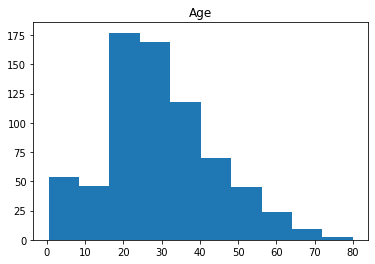

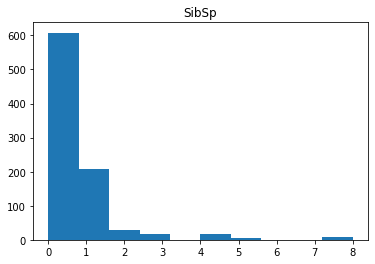

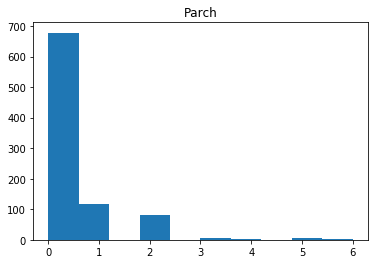

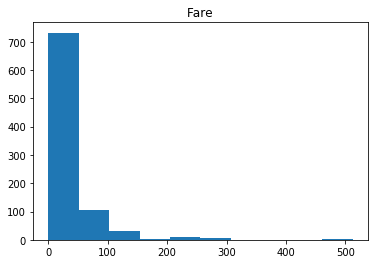

In [12]:
for x in df_num.columns:
    plt.hist(df_num[x])
    plt.title(x)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


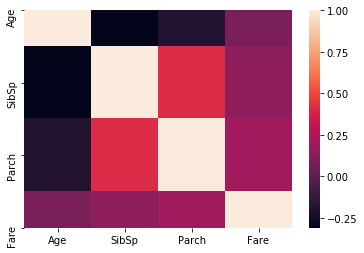

In [13]:
print(df_num.corr()) # prints a correlation between the data
sns.heatmap(df_num.corr()) # Heatmap of the correlation 

# White diagonal from top left to bottom right is a 1/1 corrleation, expected
# Negative correlation between Age/Siblings

In [14]:
pd.pivot_table(trainData, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])
# From training data, use Survived as the main index, and use numerical data to compare

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [15]:
# 1 Represents data for people that survived:
    # Younger, Richer, Kids with parents and less siblings had a greater chance to survive
# 0 Represents data for people that passed:
    # Older, Poorer, kids with no parents on board and more siblings had a less chance

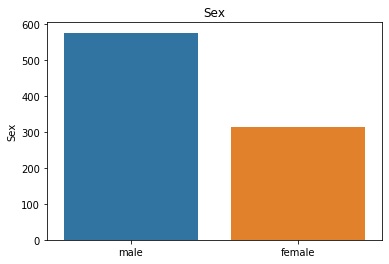

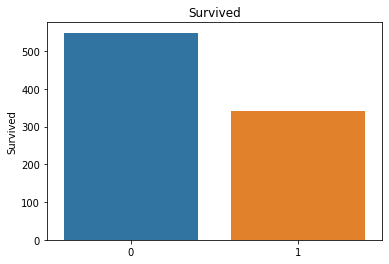

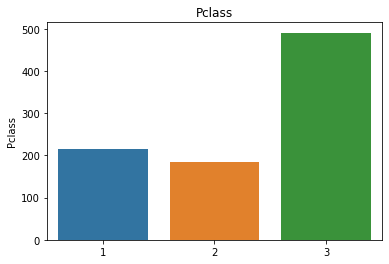

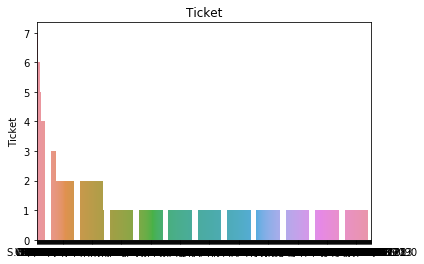

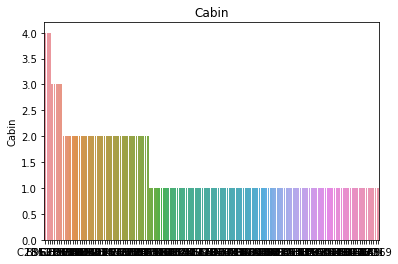

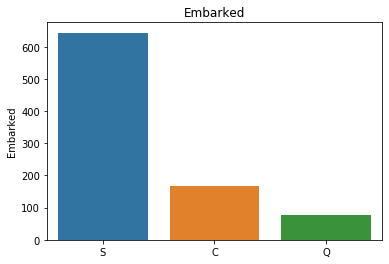

In [16]:
#looking at non-numerical data
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [17]:
# Pclass - Ticket Class
# sibsp - # of siblings and spouses 
# embarked - port of Embarkation
# parch - # of parents/children on board
# cabin - cabin number

In [18]:
print(pd.pivot_table(trainData, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc= 'count'))
print()

print(pd.pivot_table(trainData, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()

print(pd.pivot_table(trainData, index = 'Survived', columns = 'Sex', values = 'Embarked', aggfunc = 'count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Sex       female  male
Survived              
0             81   468
1            231   109


In [19]:
#We can conclude that members of the S embarkment, females and ticket class of 1 survived 
#Seperating Individual Cabins

#--------------
# Feature Engineering

In [20]:
df_cat.Cabin
trainData['cabin_multiple'] = trainData.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))) 
trainData['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [23]:
pd.pivot_table(trainData, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [24]:
#Checks survivors per cabin

trainData['cabin_adv'] = trainData.Cabin.apply(lambda x: str(x)[0])
print(trainData.cabin_adv.value_counts())

pd.pivot_table(trainData, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc = 'count')

#pd. pivot_table: take trainData database, use survived as the index, have cabins as the column values and calculates the names. 
# Counts the names in such cabin 


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [25]:
trainData['numeric_ticket'] = trainData.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
trainData['ticket_letters'] = trainData.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [28]:
trainData['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [29]:
pd.set_option('max_rows',None)
trainData['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
sopp           3
wep            3
swpp           2
scah           2
ppp            2
sotono2        2
sp             1
scahbasle      1
scow           1
sop            1
sca4           1
fc             1
as             1
sc             1
fa             1
casoton        1
Name: ticket_letters, dtype: int64

In [30]:
#Comparison between numerical tickets and non-numerical

pd.pivot_table(trainData, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [32]:
pd.pivot_table(trainData, index = 'Survived', columns = 'ticket_letters', values= 'Ticket', aggfunc= 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [35]:
trainData.Name.head()
trainData['name_title'] = trainData.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
trainData['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Ms                1
the Countess      1
Jonkheer          1
Lady              1
Mme               1
Sir               1
Capt              1
Name: name_title, dtype: int64

In [38]:
# Data Preprocessing

# Create all categorical variables

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


(889,)

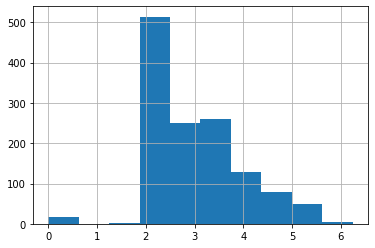

In [40]:
all_data.Age = all_data.Age.fillna(trainData.Age.median())
all_data.Fare = all_data.Fare.fillna(trainData.Fare.median())

#remove null 'embarked' rows -> 2 times
all_data.dropna(subset = ['Embarked'], inplace = True)

all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

#convert fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass. astype(str)

# create dummy variables from categories 
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#splitting to train
X_train = all_dummies[all_dummies.train_test ==1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test==0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test ==1].Survived
y_train.shape

In [41]:
#scaling the data 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test ==1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test ==0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test ==1].Survived


In [42]:
#Testing with Various models
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [45]:
# Naive Bayes method

gnb = GaussianNB()

cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print('\n')
print(cv.mean())

#Gives 72% average

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]


0.7221735542436362


In [46]:
# SVC method - Support Vector Classifier 

svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.84831461 0.8258427  0.82022472 0.79213483 0.85310734]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [60]:
#Model Tuned Performance

#Attempt to change and improve model results

def clf_performance (classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Paramters: '+ str(classifier.best_params_))
    

In [61]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.8s


SVC
Best Score: 0.8335208098987626
Best Paramters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  2.8min finished


In [ ]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

In [ ]:
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

In [ ]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [ ]:
#converting data into output  
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)